In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 


warnings.filterwarnings("ignore")

In [2]:
#reading the haberman dataset

df = pd.read_csv('haberman.csv')

In [3]:
# diaplays the first 5 rows
df.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [4]:
# shows the no. of rows and columns in the dataframe
df.shape

(306, 4)

In [5]:
# Gives the info about all the columns like the type of column, no. of non-null values etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.7 KB


In [6]:
# This shows the mean, median, std, min, max etc
df.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [7]:
#Changing the values of status to Yes and No as they are categorical in nature
df['status'] = df.status.map({1:'Yes',2:'No'})

In [8]:
#checking the no. of records for each category in Status column
df['status'].value_counts()

Yes    225
No      81
Name: status, dtype: int64

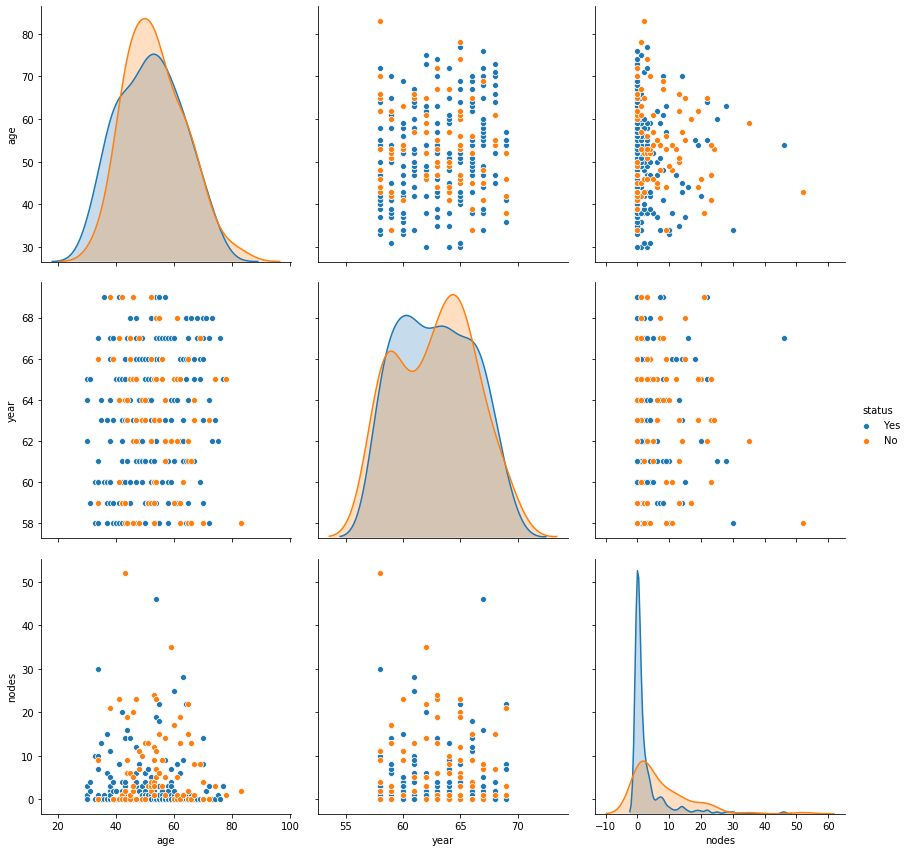

In [9]:
#Pair plot to show the relationship between the columns
plt.close();
sns.pairplot(df,hue='status',height=4)
plt.show();

The data points related to both survivors and non-survivors (regardless of plot combination) are mixed together in the pair plot above, making it impossible to identify with regular observation and necessitating extra analysis using univariable regression. 

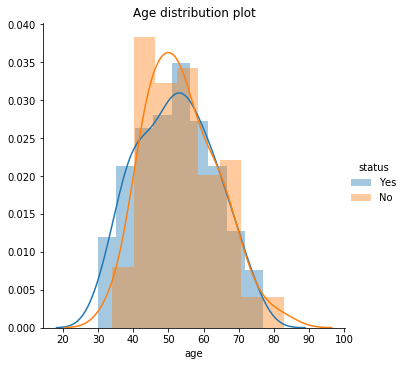

In [10]:
sns.FacetGrid(df,hue='status',size=5).map(sns.distplot,'age').add_legend()
plt.title('Age distribution plot');
plt.show();

Because of the substantial overlap, age is not a useful variable for categorizing the data. 

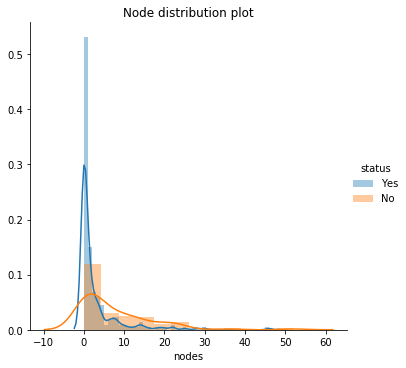

In [11]:
sns.FacetGrid(df,hue='status',size=5).map(sns.distplot,'nodes').add_legend();
plt.title('Node distribution plot')
plt.show();

The histogram above shows that the likelihood of a patient with 0 nodes surviving is higher than the probability of a patient with more than zero nodes surviving. 

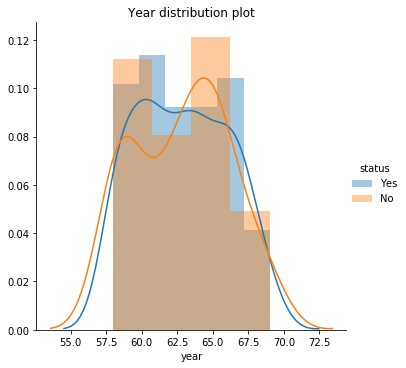

In [12]:
sns.FacetGrid(df,hue='status',size=5).map(sns.distplot,'year').add_legend();
plt.title('Year distribution plot');
plt.show();

The variable year, like age, provides not much useful information.

In [13]:
df_survivors = df.loc[df['status']=='Yes']
count, bin = np.histogram(df_survivors['nodes'],bins=50,density=True)
print(count)

[0.56521739 0.15942029 0.07246377 0.06280193 0.04830918 0.00966184
 0.01932367 0.02415459 0.02415459 0.00966184 0.00966184 0.00483092
 0.         0.00483092 0.00483092 0.01449275 0.00483092 0.00483092
 0.         0.00483092 0.00483092 0.00483092 0.         0.00966184
 0.         0.         0.         0.00483092 0.         0.
 0.00483092 0.         0.00483092 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.00483092]


In [14]:
pdf = count/sum(count)
print(pdf)

[0.52       0.14666667 0.06666667 0.05777778 0.04444444 0.00888889
 0.01777778 0.02222222 0.02222222 0.00888889 0.00888889 0.00444444
 0.         0.00444444 0.00444444 0.01333333 0.00444444 0.00444444
 0.         0.00444444 0.00444444 0.00444444 0.         0.00888889
 0.         0.         0.         0.00444444 0.         0.
 0.00444444 0.         0.00444444 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.00444444]


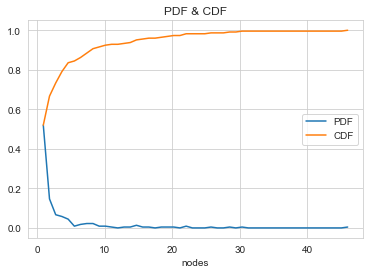

In [15]:
sns.set_style('whitegrid');
plt.plot(bin[1:],pdf)
cdf = np.cumsum(pdf)
plt.plot(bin[1:],cdf)
plt.xlabel('nodes')
plt.title('PDF & CDF')
plt.gca().legend(('PDF','CDF'));

The PDF and CDF also state that if the patient has less than one node, they has a good probability of surviving, 
and that the chances of survival decrease as the number of nodes increases. 

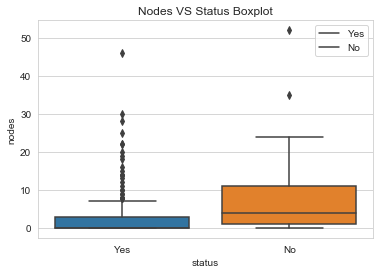

In [16]:
sns.boxplot(x='status',y='nodes',data=df)
plt.title('Nodes VS Status Boxplot')
plt.gca().legend(('Yes','No'))
plt.show();

The boxplot above shows that when the number of axillary nodes increases after 5 (i.e mean of the 'No' boxplot), the rate of fatalities rises dramatically. 

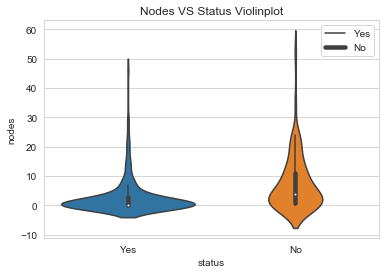

In [17]:
sns.violinplot(x='status', y='nodes', data = df)
plt.title('Nodes VS Status Violinplot')
plt.gca().legend(('Yes','No'))
plt.show()

The violin plot merely restates what the boxplot, pdf, and cdf have already said.
If the number of nodes is zero, the patient has a good chance of survival.

## Conclusions

1. The axillary node, out of all the independent factors, has the most influence on predicting a patient's post-operative condition. 

 
2. If the patient has less than one node, she has a good chance of surviving; but, as the number of nodes increases, the odds of survival decrease substantially. 

 
3. The majority of individuals who died had nodes ranging from one to twenty-four.